# Guanajuato Overview

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/con_inconsistencias/general/full.csv')
del df["Unnamed: 0"]

for element in ['fecha_reporte', 'fecha_evento', 'fecha_de_ultimo_avistamiento','fecha_de_ingreso',  'fecha_de_localizacion','fecha_probable_de_fallecimiento']:
    df[element] = pd.to_datetime(df[element],errors="coerce") # el errors coerce, tomará todos los errores en fechas como NaT, con lo que vemos inconcistencias

C:\Users\Diego\AppData\Local\Temp\ipykernel_12048\1425739908.py:1: DtypeWarning: Columns (5,7,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/con_inconsistencias/general/full.csv')


In [3]:
guanajuato = df[df["estado"] == "guanajuato"].copy()
guanajuato.T.head()

,228,1637,2332,4012,6950,9142,14601,14602,14603,14606,...,98630,98631,98774,98775,98776,98777,98842,98843,98844,99090
registro_nacional,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,...,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido
fecha_reporte,2011-04-16 12:00:00,2011-03-19 03:28:00,2007-08-13 12:00:00,2011-03-27 11:59:00,2012-04-09 12:00:00,2011-01-09 12:00:00,2009-08-27 12:00:00,2009-09-27 09:13:00,2009-01-02 07:00:00,2009-02-17 10:00:00,...,2018-01-20 09:37:04,2018-08-01 07:00:00,2018-02-17 02:53:15,2018-02-19 08:35:57,2018-02-20 02:41:06,2018-02-28 10:25:56,2018-03-22 05:12:47,2018-03-27 01:10:35,2018-03-23 11:57:33,2018-04-25 04:00:00
fecha_evento,2011-12-04 11:00:00,2011-05-01 12:00:00,2007-08-13 12:00:00,2011-03-27 04:30:00,2012-08-31 12:00:00,2011-01-09 12:00:00,2009-08-22 12:00:00,2009-09-27 09:13:00,2008-12-26 07:00:00,2009-07-02 10:00:00,...,2018-01-15 12:00:00,2018-04-01 07:00:00,2018-02-15 12:00:00,2018-02-17 05:00:00,2018-02-20 02:00:00,2018-02-26 09:30:00,2018-03-22 02:00:00,2018-03-17 12:00:00,2018-03-22 10:00:00,2018-04-22 04:00:00
estado,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,...,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato,guanajuato
clave_estado,11,11,11,11,11,11,11,11,11,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
guanajuato['year_reporte'] = guanajuato['fecha_reporte'].dt.year
guanajuato["dias_de_busqueda_reporte"] = guanajuato["fecha_de_localizacion"] - guanajuato["fecha_reporte"]
guanajuato["dias_de_busqueda_evento"] = guanajuato["fecha_de_localizacion"] - guanajuato["fecha_evento"]
guanajuato.rename(columns = {"estado_(localizado)" : "estado_localizado"}, inplace = True)
guanajuato[["year_reporte", "dias_de_busqueda_reporte","dias_de_busqueda_evento","estado_localizado"]].head()

,year_reporte,dias_de_busqueda_reporte,dias_de_busqueda_evento,estado_localizado
228,2011,NaT,NaT,no_especificado
1637,2011,300 days 08:32:00,257 days 00:00:00,queretaro
2332,2007,1894 days 00:00:00,1894 days 00:00:00,no_especificado
4012,2011,119 days 00:01:00,119 days 07:30:00,puebla
6950,2012,880 days 15:50:00,736 days 15:50:00,guanajuato


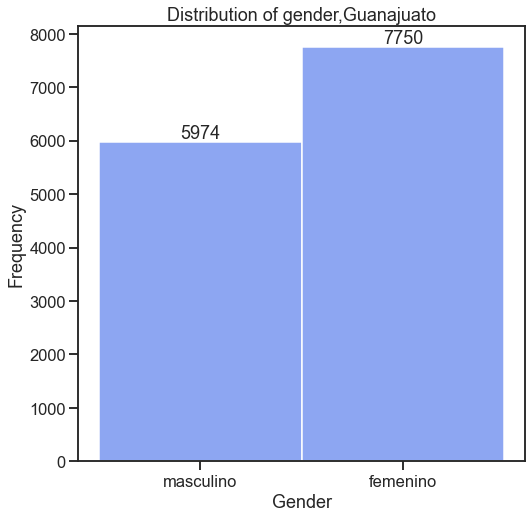

In [5]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender,Guanajuato')

ax = sns.histplot(guanajuato.sexo)
ax.bar_label(ax.containers[0])

plt.show()

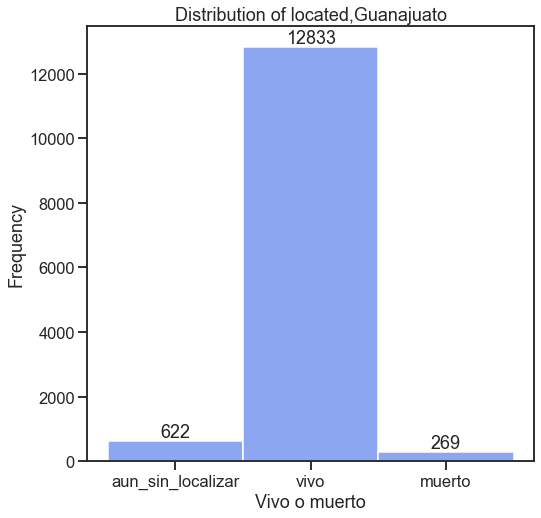

In [6]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Vivo o muerto')
plt.title('Distribution of located,Guanajuato')

ax = sns.histplot(guanajuato.vivo_o_muerto)
ax.bar_label(ax.containers[0])

plt.show()

In [7]:
guanajuato[(guanajuato["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 7616
aun_sin_localizar     102
muerto                 32
Name: vivo_o_muerto, dtype: int64

In [8]:
guanajuato[(guanajuato["sexo"] == "masculino")].vivo_o_muerto.value_counts()

vivo                 5217
aun_sin_localizar     520
muerto                237
Name: vivo_o_muerto, dtype: int64

In [9]:
guanajuato.posible_causa_desaparicion.value_counts().head()

otros_causas                   3396
problemas_en_su_casa           1701
se_fue_con_su_novio            1233
se_fue_de_fiesta_con_amigos     915
padece_de_sus_facultades        327
Name: posible_causa_desaparicion, dtype: int64

In [10]:
guanajuato[(guanajuato["sexo"] == "femenino")].posible_causa_desaparicion.value_counts().head()

otros_causas                   1753
problemas_en_su_casa           1174
se_fue_con_su_novio            1135
se_fue_de_fiesta_con_amigos     514
se_fue_con_el_novio             190
Name: posible_causa_desaparicion, dtype: int64

In [11]:
guanajuato[(guanajuato["sexo"] == "masculino")].posible_causa_desaparicion.value_counts().head()

otros_causas                       1643
problemas_en_su_casa                527
se_fue_de_fiesta_con_amigos         401
padece_de_sus_facultades            239
se_fue_a_trabajar_a_otro_estado     201
Name: posible_causa_desaparicion, dtype: int64

In [12]:
guanajuato[(guanajuato["sexo"] == "femenino")].relacion_con_grupos_delictivos.value_counts()

no    7750
Name: relacion_con_grupos_delictivos, dtype: int64

In [13]:
guanajuato[(guanajuato["sexo"] == "masculino")].relacion_con_grupos_delictivos.value_counts()

no    5973
si       1
Name: relacion_con_grupos_delictivos, dtype: int64

In [14]:
guanajuato.edad.value_counts()

15.0      1341
16.0      1162
14.0      1148
17.0       882
13.0       707
          ... 
96.0         1
89.0         1
2013.0       1
100.0        1
97.0         1
Name: edad, Length: 101, dtype: int64

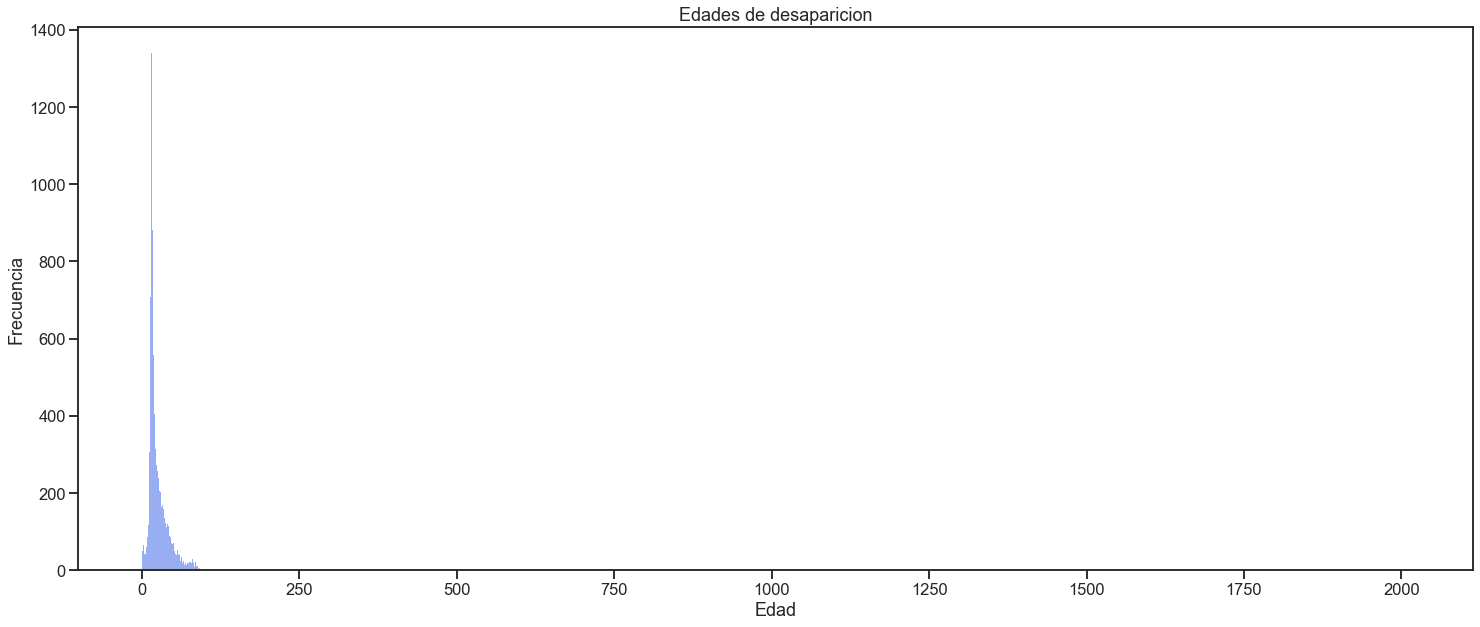

In [15]:
plt.figure(figsize=(25,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(guanajuato.edad,discrete='True')

plt.title('Edades de desaparicion')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

In [16]:
guanajuato.ocupacion.value_counts()

no_especificado        8268
estudiante             1972
empleado_particular     953
ama_de_casa             888
desempleado             520
                       ... 
guia_de_turistas          1
sastre                    1
plomero                   1
niñera                    1
masajista                 1
Name: ocupacion, Length: 68, dtype: int64

In [17]:
guanajuato.ocupacion.value_counts().head(10)

no_especificado        8268
estudiante             1972
empleado_particular     953
ama_de_casa             888
desempleado             520
comerciante             215
obrero                  142
albañil                 136
campesino               117
jornalero                68
Name: ocupacion, dtype: int64

In [18]:
len(guanajuato[(guanajuato["edad"] == 0.0)])

252

## Personas de 15 años

In [19]:
guanajuato[(guanajuato["edad"] == 15)].sexo.value_counts()

femenino     1088
masculino     253
Name: sexo, dtype: int64

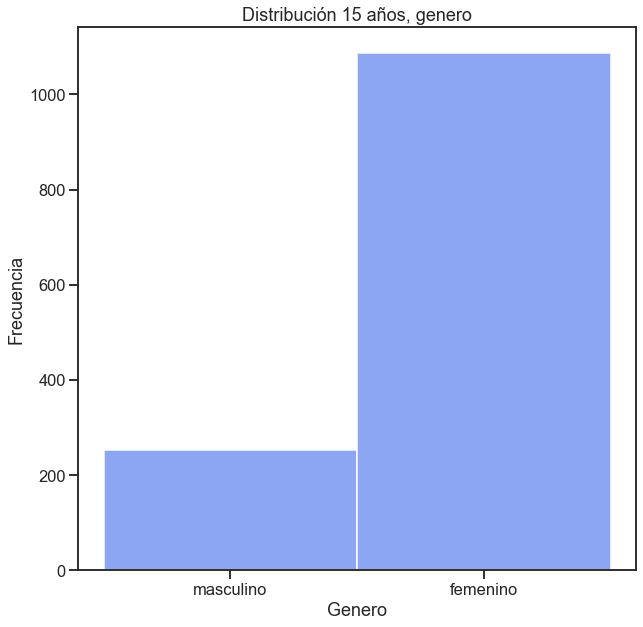

In [20]:
plt.figure(figsize=(10,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(guanajuato[(guanajuato["edad"] == 15)].sexo,discrete='True')

plt.title('Distribución 15 años, genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')

plt.show()

In [21]:
guanajuato[(guanajuato["edad"] == 15) & (guanajuato["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 1078
aun_sin_localizar       9
muerto                  1
Name: vivo_o_muerto, dtype: int64

In [22]:
guanajuato[(guanajuato["edad"] == 15) & (guanajuato["sexo"] == "masculino")].vivo_o_muerto.value_counts()

vivo                 246
aun_sin_localizar      6
muerto                 1
Name: vivo_o_muerto, dtype: int64

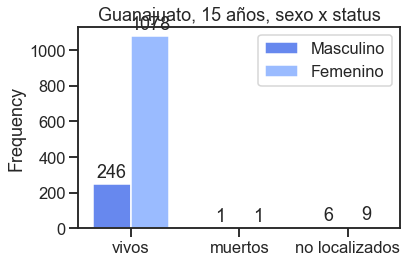

In [23]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 246,1,6]
women_means = [1078, 1, 9]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Guanajuato, 15 años, sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [24]:
guanajuato[(guanajuato["edad"] == 15) & (guanajuato["sexo"] == "femenino")].posible_causa_desaparicion.value_counts()

se_fue_con_su_novio                                                                                               234
otros_causas                                                                                                      228
problemas_en_su_casa                                                                                              172
se_fue_de_fiesta_con_amigos                                                                                       110
se_fue_con_el_novio                                                                                                32
                                                                                                                 ... 
pelea_en_su_casa                                                                                                    1
se_la_llevo_su_novio_a_la_ciudad_de_irapuato                                                                        1
se_fue_con_sus_amigos                                   

In [25]:
guanajuato[(guanajuato["edad"] == 15) & (guanajuato["sexo"] == "masculino")].posible_causa_desaparicion.value_counts()

otros_causas                   54
problemas_en_su_casa           43
se_fue_de_fiesta_con_amigos    32
se_fue_con_su_novio            23
se_desconoce                    8
                               ..
no_avisootros_causas            1
se_perdiootros_causas           1
se_fue_a_otra_ciudad            1
tuvo_problemas_con_su_mamá      1
se_peleo_con_su_hijo            1
Name: posible_causa_desaparicion, Length: 74, dtype: int64

In [26]:
guanajuato[(guanajuato["edad"]==15)].ocupacion.value_counts()

no_especificado        805
estudiante             339
ama_de_casa             90
empleado_particular     50
desempleado             41
obrero                   5
comerciante              2
campesino                2
cargador                 1
quimico                  1
albañil                  1
Name: ocupacion, dtype: int64

In [27]:
guanajuato[(guanajuato["edad"] == 15 ) & (guanajuato["sexo"]== "femenino") & (guanajuato["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

guanajuato          860
no_especificado     185
queretaro             5
veracruz              4
jalisco               4
guerrero              3
estado_de_mexico      2
puebla                2
michoacan             2
distrito_federal      2
morelos               1
yucatan               1
colima                1
baja_california       1
tamaulipas            1
hidalgo               1
nuevo_leon            1
sonora                1
sinaloa               1
Name: estado_localizado, dtype: int64

In [28]:
guanajuato[(guanajuato["edad"] == 15 ) & (guanajuato["sexo"]== "masculino") & (guanajuato["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

guanajuato          195
no_especificado      38
michoacan             3
queretaro             3
jalisco               3
baja_california       1
puebla                1
distrito_federal      1
estado_de_mexico      1
Name: estado_localizado, dtype: int64

In [29]:
guanajuato[(guanajuato["edad"] == 15)].year_reporte.value_counts()

2015    258
2014    238
2013    173
2012    116
2007    116
2011    112
2008     90
2009     89
2016     73
2010     41
2017     21
2006     14
Name: year_reporte, dtype: int64

In [30]:
guanajuato[(guanajuato["edad"] == 15)].dias_de_busqueda_reporte.describe()

count                           1335
mean       0 days 17:49:36.792509363
std      571 days 23:49:13.438841048
min             -6530 days +04:30:00
25%                  0 days 04:00:00
50%                  2 days 04:49:00
75%                 31 days 07:00:00
max               2913 days 08:00:00
Name: dias_de_busqueda_reporte, dtype: object

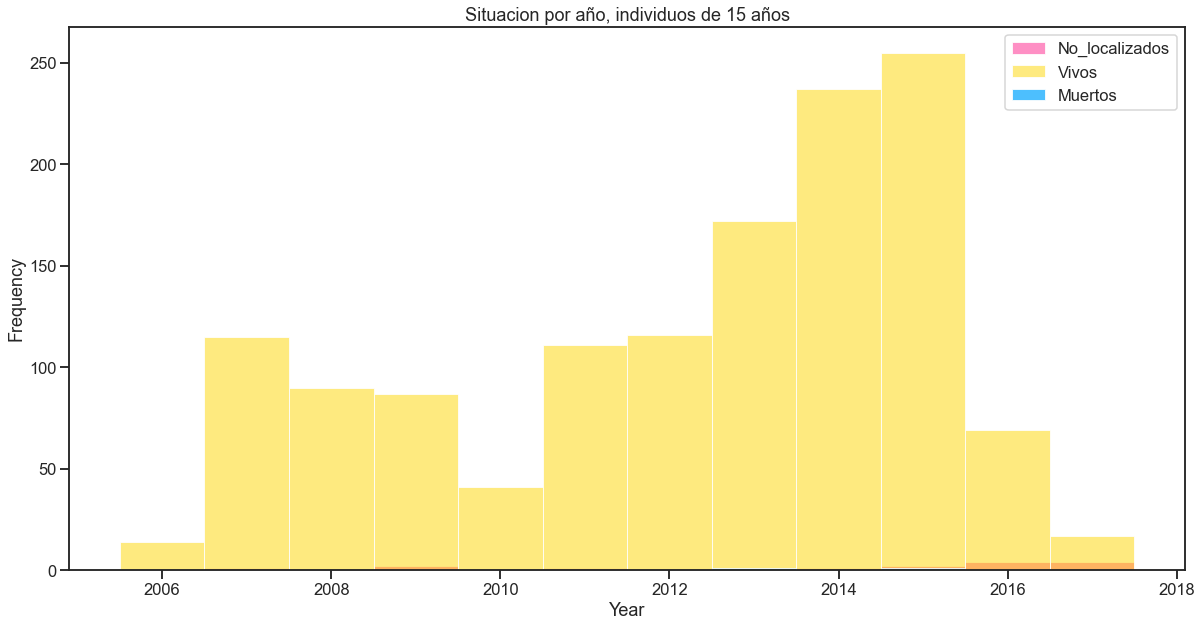

In [31]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(guanajuato[(guanajuato["vivo_o_muerto"] == "aun_sin_localizar" ) & (guanajuato["edad"] == 15)].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(guanajuato[(guanajuato["vivo_o_muerto"] == "vivo" ) & (guanajuato["edad"] == 15)].year_reporte,label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(guanajuato[(guanajuato["vivo_o_muerto"] == "muerto" ) & (guanajuato["edad"] == 15)].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Situacion por año, individuos de 15 años')

plt.show()